# How would we reproduce PIV structure in Numpy

In [ ]:
import numpy as np
data = np.ones(12, dtype = [('x', int), ('y', int),
                               ('u', float), ('v', float), 
                               ('mask', bool), ('s2n', float)])

In [ ]:
# we can assign every row of this data:
data[0] = (16,16,1.0,.5,True,1.)

In [ ]:
# or assign it using the datatype properties, x,y,u,v
x,y = np.meshgrid(np.arange(1,4)*16,np.arange(1,5)*12)

data['x'] = x.reshape(12,)
data['y'] = y.reshape(12,)

data['u'] = np.random.rand(12,)
data['v'] = np.random.rand(12,)

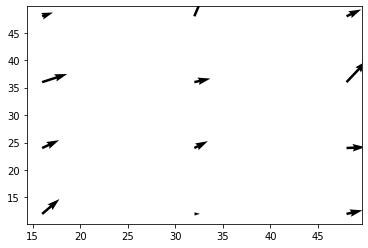

In [4]:
import matplotlib.pyplot as pl

pl.figure()
pl.quiver(data['x'],data['y'],data['u'],data['v'])

## Disadvantages

PIV data requires also metadata, header, information about the origin of the data file (image, experimental settings)
and so on. Therefore we need a format that can be easily extended, widely supported, allow use of datatypes and so on. 

Among various possibilities we have chosen the `xarray`, or so-called N-D labeled arrays, Read more about this format in this [paper](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/) or in their [docs](https://xarray.pydata.org/en/stable/)